In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8620\1325647701.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Now talk about categorical data.
# type
#1: fill data or replace with mode value
#2: fill with to replace with missing values

#Where need to apply.
#When data is missing at random.
#Mode must be excessive in the data itschange the distribution of the data.

In [14]:
var=pd.read_csv("loan_data.csv")
var.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001068,Male,Yes,0,Graduate,No,2799,2253,122,360,1,Semiurban,Y
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500,115,NaN,1,Urban,Y
16,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917,112,360,0,Rural,N


In [15]:
var.isnull().mean()

Loan_ID              0.000000
Gender               0.043478
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.130435
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.043478
Credit_History       0.043478
Property_Area        0.086957
Loan_Status          0.130435
dtype: float64

In [20]:
var=var[["Gender","Self_Employed","Property_Area"]]

In [22]:
var.sample(2)

,Gender,Self_Employed,Property_Area
17,Male,No,Semiurban
10,Male,No,Urban


Gender
Male      20
Female     2
Name: count, dtype: int64
The nul values are: 1
Graphical representation is: Axes(0.125,0.11;0.775x0.77)


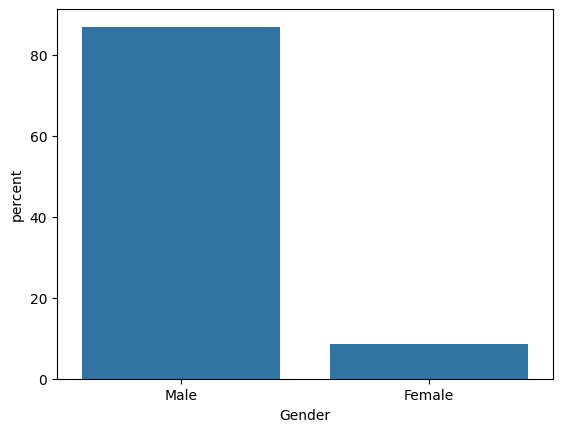

In [42]:
print(var["Gender"].value_counts())
print("The nul values are:",var["Gender"].isnull().sum())
print("Graphical representation is:",sns.countplot(x=var["Gender"],stat="percent"))

Self_Employed
No     18
Yes     2
Name: count, dtype: int64
The nul values are: 3
Graphical representation is: Axes(0.125,0.11;0.775x0.77)


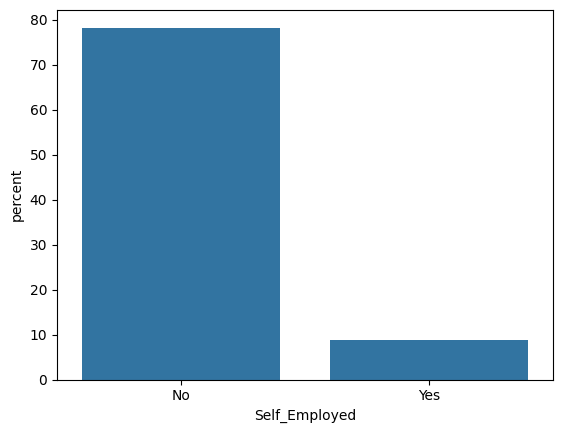

In [43]:
print(var["Self_Employed"].value_counts())
print("The nul values are:",var["Self_Employed"].isnull().sum())
print("Graphical representation is:",sns.countplot(x=var["Self_Employed"],stat="percent"))

Property_Area
Urban        14
Rural         5
Semiurban     2
Name: count, dtype: int64
The nul values are: 2
Graphical representation is: Axes(0.125,0.11;0.775x0.77)


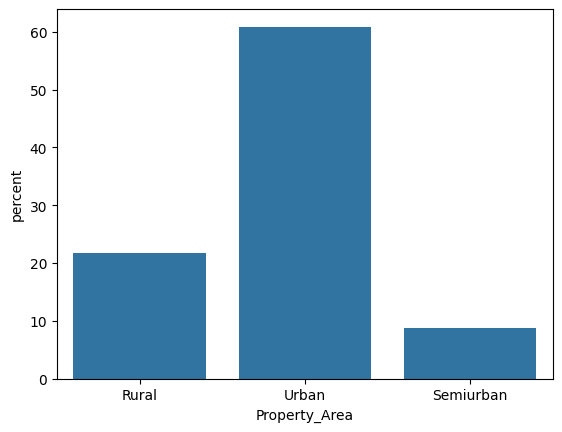

In [44]:
print(var["Property_Area"].value_counts())
print("The nul values are:",var["Property_Area"].isnull().sum())
print("Graphical representation is:",sns.countplot(x=var["Property_Area"],stat="percent"))

In [54]:
var["Property_Area"]=var["Property_Area"].fillna('Urban')
#Now again check the the null value of the colum Property_Area

In [55]:
print(f"NOw the null value inside the property area are:",var["Property_Area"].isnull().sum())

NOw the null value inside the property area are: 0


In [58]:
var["Self_Employed"]=var["Self_Employed"].fillna('No')
#Now again check the the null value of the colum Self_Employed

In [60]:
print(f"NOw the null value inside the Self_Employed are:",var["Self_Employed"].isnull().sum())

NOw the null value inside the Self_Employed are: 0


In [63]:
#Now fill the Gender missing value with Gender Mode
var["Gender"]=var["Gender"].fillna("Male")
#Now checking that the values are filled r not
var["Gender"].isnull().sum()

0

In [64]:
var.isnull().sum()

Gender           0
Self_Employed    0
Property_Area    0
dtype: int64

In [67]:
#Again doing the same thing but with the sklearn imputer class.
df=pd.read_csv("loan_data.csv")
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y
14,LP001043,Male,Yes,0,Not Graduate,No,7660,0,104,360,0,Urban,N


In [72]:
df.isnull().sum()

Gender           1
Self_Employed    3
Property_Area    2
dtype: int64

In [75]:
si=SimpleImputer(strategy="most_frequent")

In [78]:
df[["Gender"]]=si.fit_transform(df[["Gender"]])

In [80]:
df["Gender"].isnull().mean()

0.0

In [87]:
s2=SimpleImputer(strategy="constant",fill_value="Missing")
df["Self_Employed"].value_counts()

Self_Employed
No     18
Yes     2
Name: count, dtype: int64

In [89]:
df[["Self_Employed"]]=s2.fit_transform(df[["Self_Employed"]])

<Axes: xlabel='Self_Employed'>

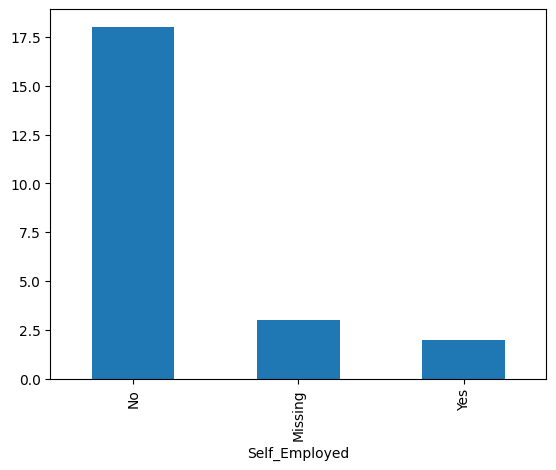

In [93]:
df["Self_Employed"].value_counts().plot(kind='bar')

In [94]:
df.isnull().sum()

Gender           0
Self_Employed    0
Property_Area    2
dtype: int64

In [97]:
df["Property_Area"].isnull().sum()

2

In [98]:
s3=SimpleImputer(strategy="most_frequent")

In [99]:
df[['Property_Area']]=s3.fit_transform(df[["Property_Area"]])

In [101]:
df["Property_Area"].isnull().sum()

0

<Axes: xlabel='Property_Area'>

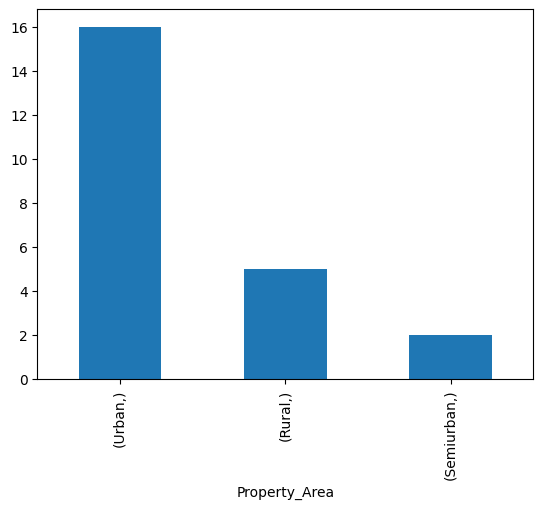

In [107]:
df[["Property_Area"]].value_counts().plot(kind="bar")